In [1]:
import pandas as pd
df1 = pd.read_csv('IMDB Dataset.csv')
df = df1.copy()
df['sentiment']=df['sentiment'].replace({'positive':1,'negative':0})
df = df[0:5000]
df.head(100)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,1
96,My guess would be this was originally going to...,0
97,"Well, I like to watch bad horror B-Movies, cau...",0
98,"This IS the worst movie I have ever seen, as w...",0


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], random_state=0)


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [4]:
from sklearn.svm import SVC
import pickle
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
file2=open("svmModle.sav","wb")
pickle.dump(clf,file2)
file2.close()

In [5]:
acc = clf.score(X_test, y_test)
print(f'Train accuracy: {acc:.3f}')


Train accuracy: 0.818


# # Testing on Movie Review - 1 

In [6]:
# Load the saved vectorizer from the binary file
import pickle
with open('vectorizer.sav', 'rb') as file:
    tfidf_loaded = pickle.load(file)

# Load the saved model from the binary file
with open('svmModle.sav', 'rb') as file:
    clf_loaded = pickle.load(file)
    


In [7]:
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

    

# Load the test data
test_df = pd.read_csv("dataset1.csv")
test_df.columns = ['review', 'sentiment']
print(test_df.head(10))


                                              review  sentiment
0  I always wrote this series off as being a comp...          0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...          0
2  This movie was so poorly written and directed ...          0
3  The most interesting thing about Miryang (Secr...          1
4  when i first read about "berlin am meer" i did...          0
5  I saw this film on September 1st, 2005 in Indi...          1
6  I saw a screening of this movie last night. I ...          0
7  William Hurt may not be an American matinee id...          1
8  IT IS A PIECE OF CRAP! not funny at all. durin...          0
9  I'M BOUT IT(1997)<br /><br />Developed & publi...          0


In [8]:
# Preprocess the test data using CountVectorizer
X_test = vectorizer.transform(test_df['review'])
y_test=test_df['sentiment']
# Use the loaded model (SVM) to predict the sentiment of the test data
y_pred = clf_loaded.predict(X_test)
# for i in y_pred:
#     if(i==0):
#         print("negative")
#     else:
#         print("Positive")
print(y_pred)
print(clf_loaded.score(X_test,y_test))



[1 0 0 ... 0 0 0]
0.8426


Confusion Matrix : 
[[2022  473]
 [ 314 2191]]
Confusion matrix:
[[2022  473]
 [ 314 2191]]


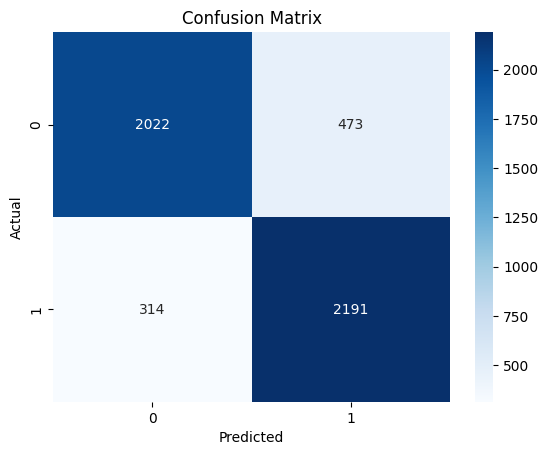

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Print the confusion matrix
print("Confusion Matrix : ")
print(metrics.confusion_matrix(test_df['sentiment'], y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{cm}')

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print(metrics.classification_report(test_df['sentiment'], y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2495
           1       0.82      0.87      0.85      2505

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

